In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline 

#options d'affichages
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

#"turn-off" warnings
warnings.filterwarnings("ignore")

#show pipeline
from sklearn import set_config
set_config(display='diagram')

---

# Importation des données

In [3]:
df = pd.read_pickle('df_cleaned.pickle')
print('Dimension du dataset nettoyé:')
print('Lignes: {}'.format(df.shape[0]) + ' \nColonnes: {}'.format(df.shape[1]))

Dimension du dataset nettoyé:
Lignes: 1696 
Colonnes: 24


In [4]:
df.head(2)

OSEBuildingID  DataYear    BuildingType        PrimaryPropertyType  \
0            325      2015  NonResidential               Retail store   
1            400      2015  NonResidential  Small and midsized office   

                   PropertyName       Address  CouncilDistrictCode  \
0  WESTLAKE MALL RETAIL PORTION   400 PINE ST                    7   
1    GALLAND & SENECA BUILDINGS  1201 2ND AVE                    7   

  Neighborhood   Latitude   Longitude  YearBuilt LargestPropertyUseType  \
0     DOWNTOWN  47.611711 -122.336816       1989                Unknown   
1     DOWNTOWN  47.606799 -122.337100       1906                 Office   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0             4.0          111077.0             91.0   
1                1.0             6.0           98370.0             45.0   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
0            9898724.0              69.01                   0.24   
1            6525887.0              47.24                   0.20   

   TotalUseTypeNumber  GFABuildingRate  GFAParkingRate  GFAPerBuilding  \
0                   1          1.00000         0.00000        111077.0   
1                   1          0.73651         0.26349         98370.0   

   GFAPerFloor  
0     27769.25  
1     16395.00

# Analyse complémentaire et feature engineering

Suppression de colonnes inutiles rapportant à l'identification du bâtiment ou à des données de relevés coûteux.

In [5]:
df = df.drop(['OSEBuildingID','Address','PropertyName','GHGEmissionsIntensity'], axis=1) 

Je créer une nouvelle variable qui correspond à l'âge du batiment

In [6]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt'] 

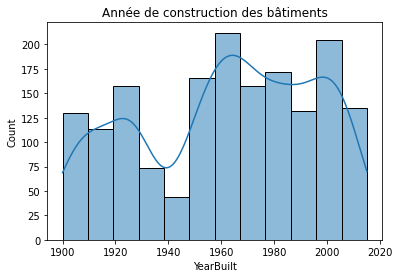

In [7]:
 sns.histplot(data=df, x="YearBuilt", kde=True)
plt.title('Année de construction des bâtiments')
plt.show()

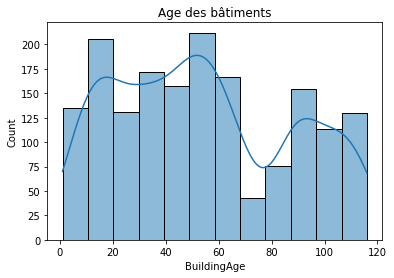

In [8]:
sns.histplot(data=df, x="BuildingAge", kde=True)
plt.title('Age des bâtiments')
plt.show()

In [9]:
df.dtypes.sort_values()

DataYear                    int64
TotalUseTypeNumber          int64
YearBuilt                   int64
BuildingAge                 int64
CouncilDistrictCode         int64
ENERGYSTARScore           float64
GFAPerBuilding            float64
GFAParkingRate            float64
GFABuildingRate           float64
TotalGHGEmissions         float64
SiteEnergyUse(kBtu)       float64
NumberofFloors            float64
GFAPerFloor               float64
NumberofBuildings         float64
Longitude                 float64
Latitude                  float64
PropertyGFATotal          float64
LargestPropertyUseType     object
BuildingType               object
PrimaryPropertyType        object
Neighborhood               object
dtype: object

In [10]:
df.BuildingType.value_counts()

NonResidential        1487
SPS-District K-12       98
Nonresidential COS      85
Campus                  25
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [11]:
df['PropertyGFATotal_log'] =  np.log(df['PropertyGFATotal']) 
df['PropertyGFATotal_sqrt'] =  np.sqrt(df['PropertyGFATotal'])
df['PropertyGFATotal_square'] =  np.square(df['PropertyGFATotal'])

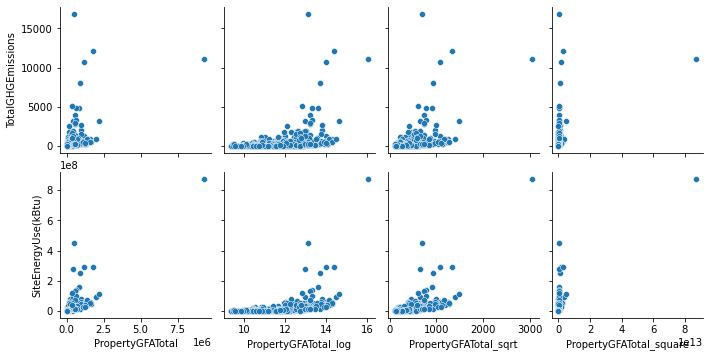

In [12]:
sns.pairplot(
    df,
    x_vars=["PropertyGFATotal",'PropertyGFATotal_log','PropertyGFATotal_sqrt','PropertyGFATotal_square'],
    y_vars=['TotalGHGEmissions','SiteEnergyUse(kBtu)'],
)

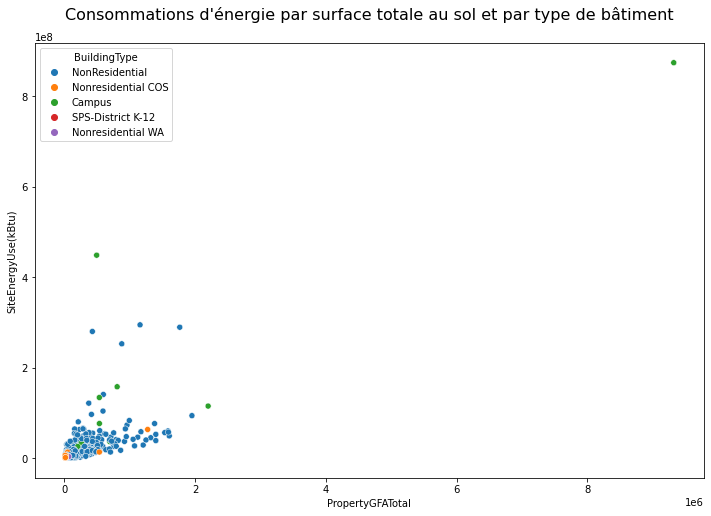

In [13]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", fontsize=16)
plt.show()

In [14]:
df[df['SiteEnergyUse(kBtu)']>8*1e8]

DataYear BuildingType PrimaryPropertyType  CouncilDistrictCode  \
1656      2016       Campus          University                    4   

     Neighborhood  Latitude  Longitude  YearBuilt LargestPropertyUseType  \
1656    NORTHEAST  47.65644 -122.31041       1900     College/University   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
1656              111.0             1.0         9320156.0             72.5   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  \
1656          873923712.0           11140.56                   1   

      GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
1656              1.0             0.0       83965.369    9320156.0   

      BuildingAge  PropertyGFATotal_log  PropertyGFATotal_sqrt  \
1656          116              16.04769            3052.893054   

      PropertyGFATotal_square  
1656             8.686531e+13

In [15]:
df = df[df['SiteEnergyUse(kBtu)']<8*1e8]

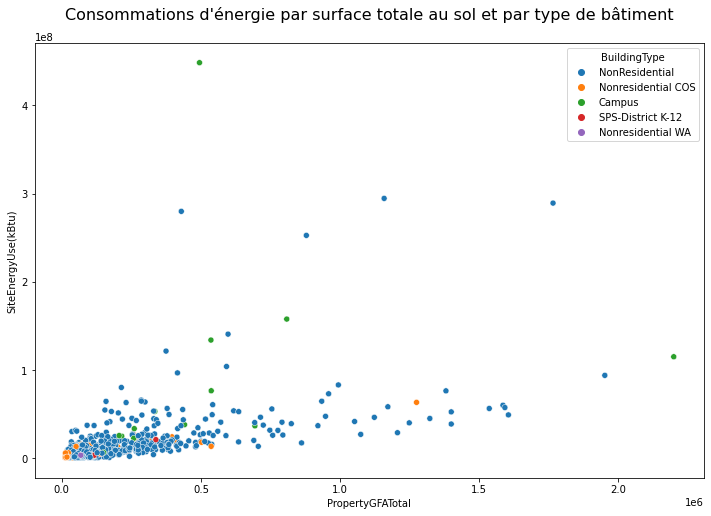

In [16]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", fontsize=16)
plt.show()

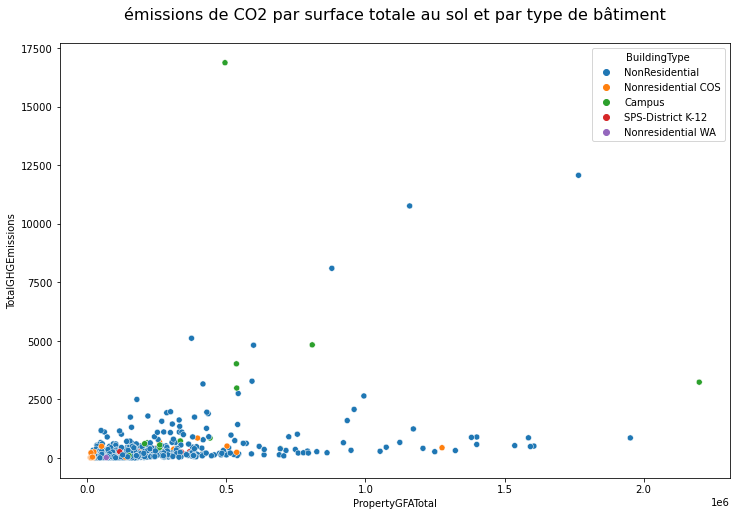

In [17]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"émissions de CO2 par surface totale au sol et par type de bâtiment\n", fontsize=16)
plt.show()

In [18]:
df = df[df['TotalGHGEmissions']<1000]

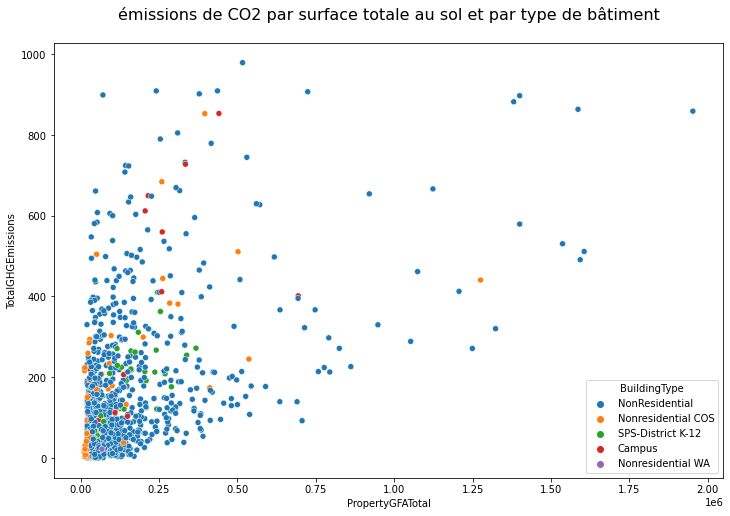

In [19]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"émissions de CO2 par surface totale au sol et par type de bâtiment\n", fontsize=16)
plt.show()

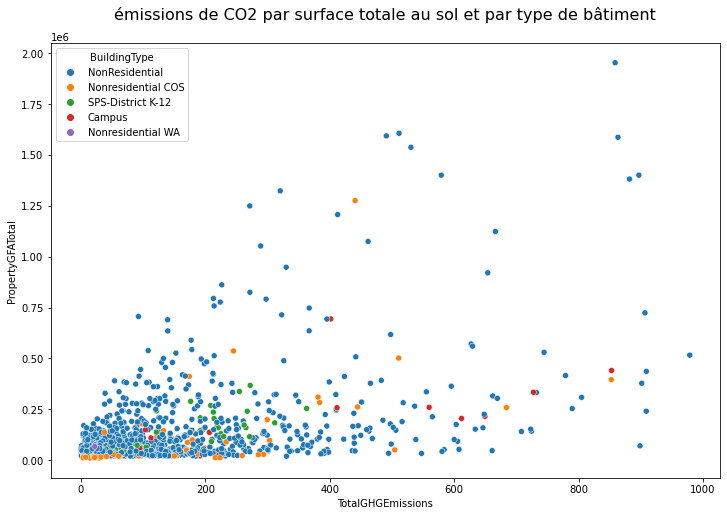

In [20]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='PropertyGFATotal', hue='BuildingType')
plt.title(f"émissions de CO2 par surface totale au sol et par type de bâtiment\n", fontsize=16)
plt.show()

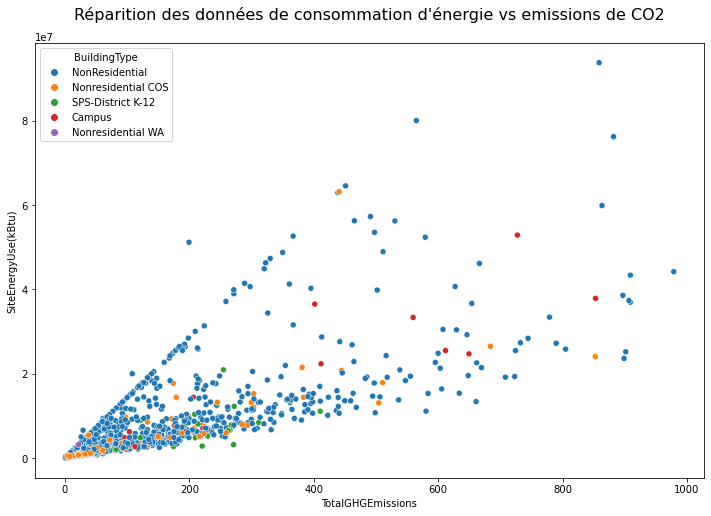

In [21]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.show()

In [56]:
df[(df['SiteEnergyUse(kBtu)'] > 4*1e7) & (df['TotalGHGEmissions'] < 250)]

BuildingType PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
1659  NonResidential          University                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt LargestPropertyUseType  \
1659  47.65356 -122.30613       1998     College/University   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
1659                1.0             6.0          203030.0             72.5   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  \
1659           51168308.0             199.48                   1   

      GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
1659              1.0             0.0        203030.0    33838.333   

      BuildingAge  PropertyGFATotal_log  PropertyGFATotal_sqrt  \
1659           18             12.221109             450.588504   

      PropertyGFATotal_square  GFAPerBuilding_log  GFAPerBuilding_sqrt  \
1659             4.122118e+10           12.221109           450.588504   

      GFAPerBuilding_square  GFAParkingRate_log  GFAParkingRate_sqrt  \
1659           4.122118e+10                 0.0                  0.0   

      GFAParkingRate_square  GFABuildingRate_log  GFABuildingRate_sqrt  \
1659                    0.0                  0.0                   1.0   

      GFABuildingRate_square  GFAPerFloor_log  GFAPerFloor_sqrt  \
1659                     1.0         10.42935        183.951986   

      GFAPerFloor_square  
1659        1.145033e+09

In [57]:
df = df.drop(df[(df['SiteEnergyUse(kBtu)'] > 4*1e7) & (df['TotalGHGEmissions'] < 250)].index)

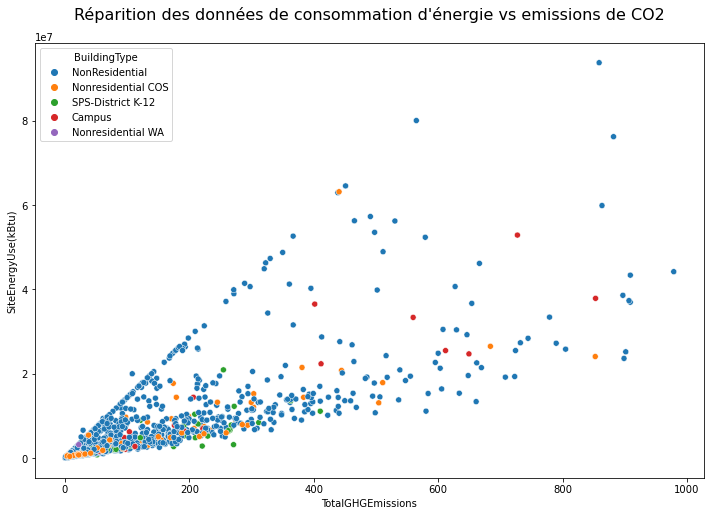

In [59]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.show()

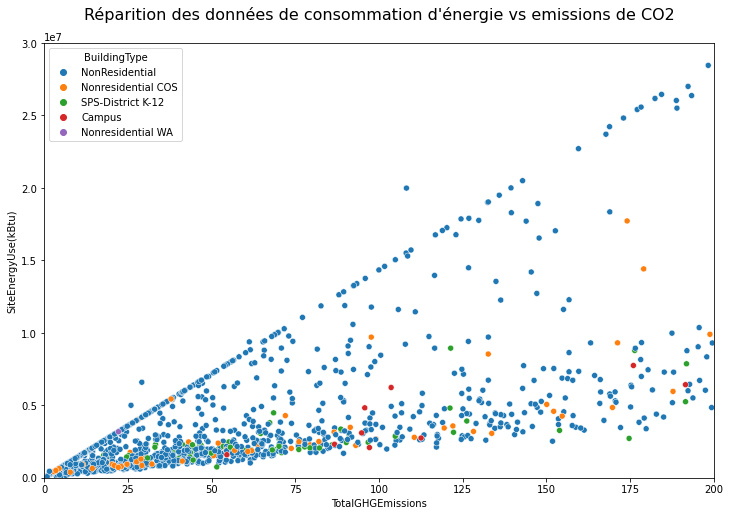

In [62]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.ylim(0, 3*1e7)
plt.xlim(0, 200)
 
plt.show()

In [66]:
df[(df['SiteEnergyUse(kBtu)'] > 1.8*1e7) & (df['TotalGHGEmissions'] < 125)]

BuildingType        PrimaryPropertyType  CouncilDistrictCode  \
619  NonResidential  Small and midsized office                    1   

    Neighborhood  Latitude  Longitude  YearBuilt LargestPropertyUseType  \
619     DELRIDGE  47.54103 -122.33766       1929                 Office   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
619                1.0             3.0           85126.0             50.0   

     SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  \
619           19985481.0              108.2                   1   

     GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
619              1.0             0.0         85126.0    28375.333   

     BuildingAge  PropertyGFATotal_log  PropertyGFATotal_sqrt  \
619           87             11.351888             291.763603   

     PropertyGFATotal_square  GFAPerBuilding_log  GFAPerBuilding_sqrt  \
619             7.246436e+09           11.351888           291.763603   

     GFAPerBuilding_square  GFAParkingRate_log  GFAParkingRate_sqrt  \
619           7.246436e+09                 0.0                  0.0   

     GFAParkingRate_square  GFABuildingRate_log  GFABuildingRate_sqrt  \
619                    0.0                  0.0                   1.0   

     GFABuildingRate_square  GFAPerFloor_log  GFAPerFloor_sqrt  \
619                     1.0        10.253275        168.449794   

     GFAPerFloor_square  
619        8.051595e+08

In [67]:
df = df.drop(df[(df['SiteEnergyUse(kBtu)'] > 1.8*1e7) & (df['TotalGHGEmissions'] < 125)].index)

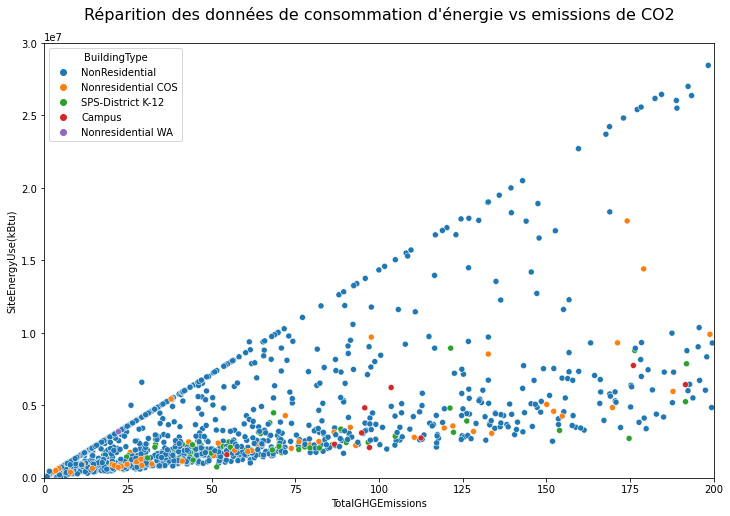

In [68]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.ylim(0, 3*1e7)
plt.xlim(0, 200)
 
plt.show()

In [72]:
df[(df['SiteEnergyUse(kBtu)'] > 0.48*1e7) & (df['TotalGHGEmissions'] < 30)]

BuildingType PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
471   NonResidential        Large office                    2     DOWNTOWN   
1657  NonResidential          University                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt LargestPropertyUseType  \
471   47.59878 -122.33458       1913                 Office   
1657  47.65395 -122.30584       1969     College/University   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
471                 3.0             7.0          154159.0            100.0   
1657                1.0             4.0           58779.0             72.5   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  \
471             6593180.5             29.155                   1   
1657            5000717.0             25.930                   1   

      GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
471               1.0             0.0       51386.333    22022.714   
1657              1.0             0.0       58779.000    14694.750   

      BuildingAge  PropertyGFATotal_log  PropertyGFATotal_sqrt  \
471           103              11.94574             392.630870   
1657           47              10.98154             242.443808   

      PropertyGFATotal_square  GFAPerBuilding_log  GFAPerBuilding_sqrt  \
471              2.376500e+10           10.847128           226.685538   
1657             3.454971e+09           10.981540           242.443808   

      GFAPerBuilding_square  GFAParkingRate_log  GFAParkingRate_sqrt  \
471            2.640555e+09                 0.0                  0.0   
1657           3.454971e+09                 0.0                  0.0   

      GFAParkingRate_square  GFABuildingRate_log  GFABuildingRate_sqrt  \
471                     0.0                  0.0                   1.0   
1657                    0.0                  0.0                   1.0   

      GFABuildingRate_square  GFAPerFloor_log  GFAPerFloor_sqrt  \
471                      1.0         9.999830        148.400519   
1657                     1.0         9.595246        121.221904   

      GFAPerFloor_square  
471         4.849999e+08  
1657        2.159357e+08

In [74]:
df = df.drop(df[(df['SiteEnergyUse(kBtu)'] > 0.48*1e7) & (df['TotalGHGEmissions'] < 30)].index)

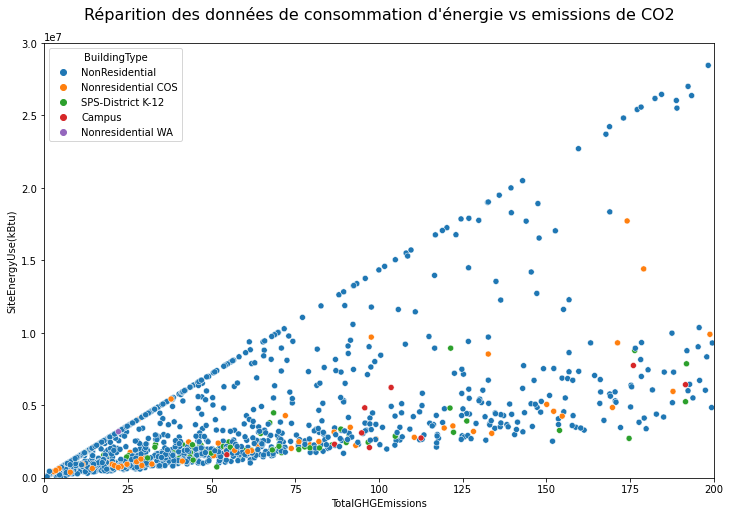

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.ylim(0, 3*1e7)
plt.xlim(0, 200)
 
plt.show()

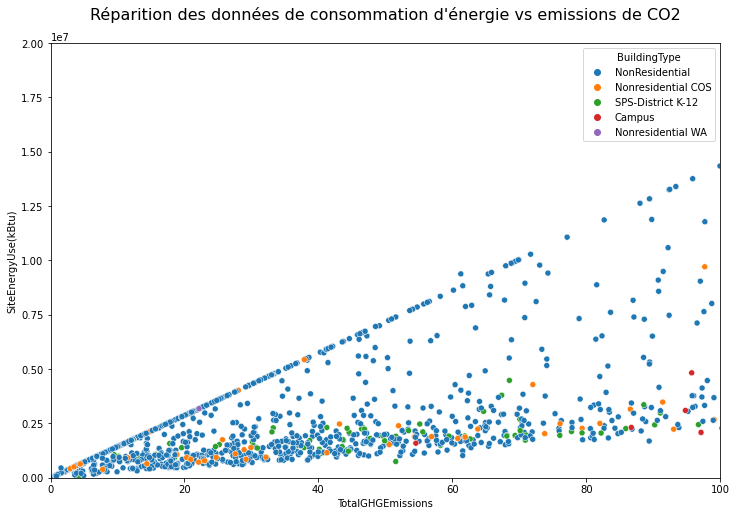

In [81]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.ylim(0, 2*1e7)
plt.xlim(0, 100)
 
plt.show()

In [83]:
df[(df['SiteEnergyUse(kBtu)'] > 0.9*1e7) & (df['TotalGHGEmissions'] < 65)]

BuildingType PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
428  NonResidential        Large office                    7   LAKE UNION   

     Latitude  Longitude  YearBuilt LargestPropertyUseType  NumberofBuildings  \
428  47.62029 -122.33078       2005                 Office                1.0   

     NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
428             6.0          336700.0             94.5            9378391.0   

     TotalGHGEmissions  TotalUseTypeNumber  GFABuildingRate  GFAParkingRate  \
428             61.265                   3          0.62934         0.37066   

     GFAPerBuilding  GFAPerFloor  BuildingAge  PropertyGFATotal_log  \
428        336700.0    56116.667           11             12.726948   

     PropertyGFATotal_sqrt  PropertyGFATotal_square  GFAPerBuilding_log  \
428             580.258563             1.133669e+11           12.726948   

     GFAPerBuilding_sqrt  GFAPerBuilding_square  GFAParkingRate_log  \
428           580.258563           1.133669e+11            0.315292   

     GFAParkingRate_sqrt  GFAParkingRate_square  GFABuildingRate_log  \
428             0.608819               0.137389            -0.463084   

     GFABuildingRate_sqrt  GFABuildingRate_square  GFAPerFloor_log  \
428               0.79331                0.396069        10.935188   

     GFAPerFloor_sqrt  GFAPerFloor_square  
428        236.889567        3.149080e+09

In [84]:
df = df.drop(df[(df['SiteEnergyUse(kBtu)'] > 0.9*1e7) & (df['TotalGHGEmissions'] < 65)].index)

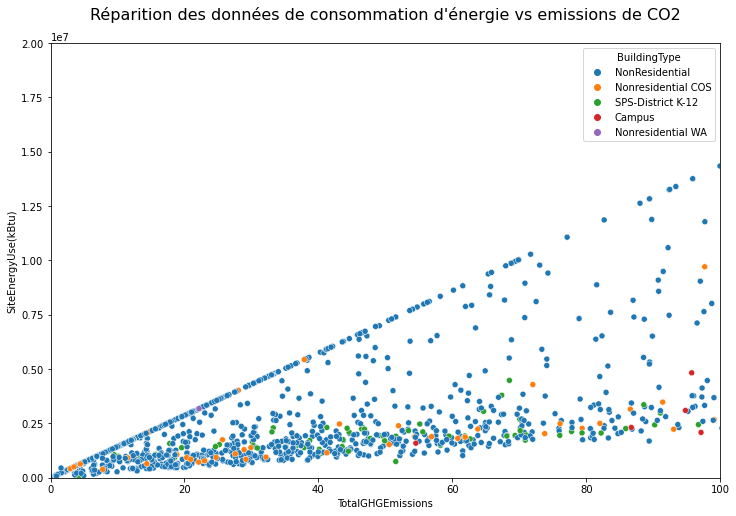

In [85]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.ylim(0, 2*1e7)
plt.xlim(0, 100)
 
plt.show()

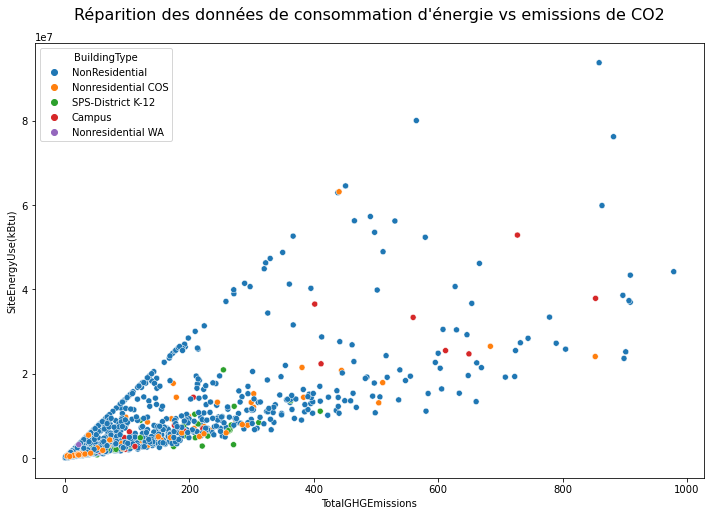

In [86]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='TotalGHGEmissions', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Réparition des données de consommation d'énergie vs emissions de CO2\n", fontsize=16)
plt.show()

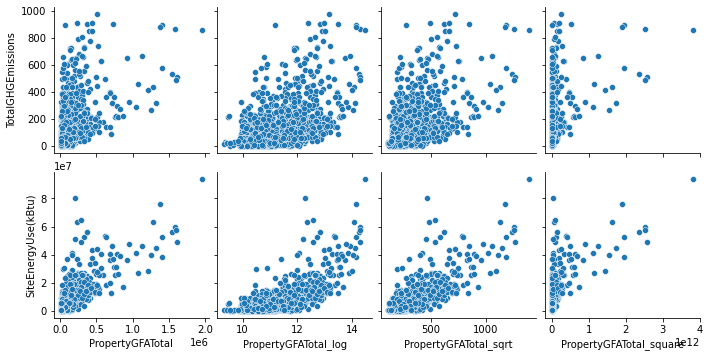

In [22]:
sns.pairplot(
    df,
    x_vars=["PropertyGFATotal",'PropertyGFATotal_log','PropertyGFATotal_sqrt','PropertyGFATotal_square'],
    y_vars=['TotalGHGEmissions','SiteEnergyUse(kBtu)'],
)

In [23]:
df['GFAPerBuilding_log'] =  np.log(df['GFAPerBuilding']) 
df['GFAPerBuilding_sqrt'] =  np.sqrt(df['GFAPerBuilding'])
df['GFAPerBuilding_square'] =  np.square(df['GFAPerBuilding'])

df['GFAParkingRate_log'] =  np.log1p(df['GFAParkingRate']) 
df['GFAParkingRate_sqrt'] =  np.sqrt(df['GFAParkingRate'])
df['GFAParkingRate_square'] =  np.square(df['GFAParkingRate'])

df['GFABuildingRate_log'] =  np.log(df['GFABuildingRate'])  
df['GFABuildingRate_sqrt'] =  np.sqrt(df['GFABuildingRate'])
df['GFABuildingRate_square'] =  np.square(df['GFABuildingRate'])

df['GFAPerFloor_log'] =  np.log(df['GFAPerFloor']) 
df['GFAPerFloor_sqrt'] =  np.sqrt(df['GFAPerFloor'])
df['GFAPerFloor_square'] =  np.square(df['GFAPerFloor'])

In [24]:
df.describe().T

count          mean           std           min  \
DataYear                 1652.0  2.015982e+03  1.335696e-01  2.015000e+03   
CouncilDistrictCode      1652.0  4.357748e+00  2.195140e+00  1.000000e+00   
Latitude                 1652.0  4.761607e+01  4.848247e-02  4.749917e+01   
Longitude                1652.0 -1.223330e+02  2.471097e-02 -1.224118e+02   
YearBuilt                1652.0  1.961412e+03  3.281582e+01  1.900000e+03   
NumberofBuildings        1652.0  1.070823e+00  7.052686e-01  1.000000e+00   
NumberofFloors           1652.0  3.960351e+00  6.347816e+00  1.000000e+00   
PropertyGFATotal         1652.0  1.021880e+05  1.698857e+05  1.128500e+04   
ENERGYSTARScore          1652.0  6.761077e+01  2.336212e+01  1.000000e+00   
SiteEnergyUse(kBtu)      1652.0  5.769554e+06  9.032946e+06  0.000000e+00   
TotalGHGEmissions        1652.0  1.065468e+02  1.485301e+02  1.200000e-01   
TotalUseTypeNumber       1652.0  1.883777e+00  1.208110e+00  1.000000e+00   
GFABuildingRate          1652.0  9.388043e-01  1.430391e-01  7.650000e-02   
GFAParkingRate           1652.0  6.120689e-02  1.402211e-01  0.000000e+00   
GFAPerBuilding           1652.0  9.946208e+04  1.679845e+05  7.166667e+03   
GFAPerFloor              1652.0  3.385592e+04  4.706834e+04  2.216970e+02   
BuildingAge              1652.0  5.457022e+01  3.280716e+01  1.000000e+00   
PropertyGFATotal_log     1652.0  1.099282e+01  9.035157e-01  9.331230e+00   
PropertyGFATotal_sqrt    1652.0  2.746199e+02  1.636708e+02  1.062309e+02   
PropertyGFATotal_square  1652.0  3.928606e+10  2.087103e+11  1.273512e+08   
GFAPerBuilding_log       1652.0  1.096563e+01  9.010380e-01  8.877196e+00   
GFAPerBuilding_sqrt      1652.0  2.707735e+02  1.617393e+02  8.465617e+01   
GFAPerBuilding_square    1652.0  3.809442e+10  2.080209e+11  5.136112e+07   
GFAParkingRate_log       1652.0  5.208713e-02  1.159269e-01  0.000000e+00   
GFAParkingRate_sqrt      1652.0  1.069515e-01  2.231556e-01  0.000000e+00   
GFAParkingRate_square    1652.0  2.339634e-02  7.048100e-02  0.000000e+00   
GFABuildingRate_log      1652.0 -8.028635e-02  2.081685e-01 -2.570465e+00   
GFABuildingRate_sqrt     1652.0  9.652489e-01  8.428007e-02  2.765863e-01   
GFABuildingRate_square   1652.0  9.018012e-01  2.224618e-01  5.852250e-03   
GFAPerFloor_log          1652.0  1.006599e+01  7.783254e-01  5.401312e+00   
GFAPerFloor_sqrt         1652.0  1.665117e+02  7.831667e+01  1.488949e+01   
GFAPerFloor_square       1652.0  3.360310e+09  2.636009e+10  4.914956e+04   

                                  25%           50%           75%  \
DataYear                 2.016000e+03  2.016000e+03  2.016000e+03   
CouncilDistrictCode      2.000000e+00  4.000000e+00  7.000000e+00   
Latitude                 4.758481e+01  4.761240e+01  4.764976e+01   
Longitude               -1.223435e+02 -1.223330e+02 -1.223214e+02   
YearBuilt                1.930000e+03  1.965000e+03  1.989000e+03   
NumberofBuildings        1.000000e+00  1.000000e+00  1.000000e+00   
NumberofFloors           1.000000e+00  2.000000e+00  4.000000e+00   
PropertyGFATotal         2.884700e+04  4.789950e+04  9.864250e+04   
ENERGYSTARScore          6.100000e+01  7.250000e+01  8.200000e+01   
SiteEnergyUse(kBtu)      1.185701e+06  2.467800e+06  6.454912e+06   
TotalGHGEmissions        1.956625e+01  4.762000e+01  1.291888e+02   
TotalUseTypeNumber       1.000000e+00  2.000000e+00  2.000000e+00   
GFABuildingRate          1.000000e+00  1.000000e+00  1.000000e+00   
GFAParkingRate           0.000000e+00  0.000000e+00  0.000000e+00   
GFAPerBuilding           2.859650e+04  4.687900e+04  9.521300e+04   
GFAPerFloor              1.311067e+04  2.271975e+04  3.745847e+04   
BuildingAge              2.700000e+01  5.100000e+01  8.600000e+01   
PropertyGFATotal_log     1.026976e+01  1.077686e+01  1.149926e+01   
PropertyGFATotal_sqrt    1.698440e+02  2.188595e+02  3.140740e+02   
PropertyGFATotal_square  8.321494e+08  2.294366e+09  9.730343e+09   
GFAPerBuilding_log       1.026104e+

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='Count'>

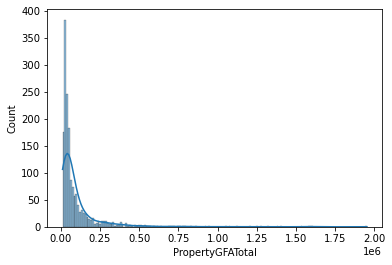

In [25]:
sns.histplot(data=df, x="PropertyGFATotal", kde=True)

<AxesSubplot:xlabel='PropertyGFATotal_log', ylabel='Count'>

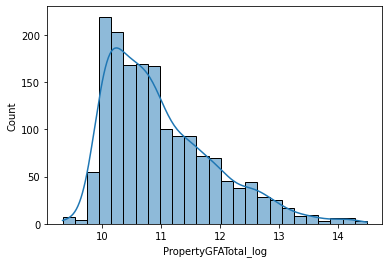

In [26]:
sns.histplot(data=df, x="PropertyGFATotal_log", kde=True)

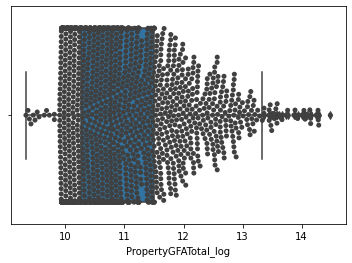

In [27]:
ax = sns.boxplot(x=df["PropertyGFATotal_log"])
ax = sns.swarmplot(x="PropertyGFATotal_log",data=df, color=".25")

<AxesSubplot:xlabel='PropertyGFATotal_sqrt', ylabel='Count'>

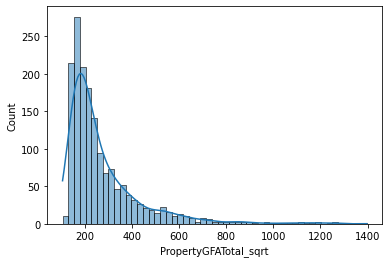

In [28]:
sns.histplot(data=df, x="PropertyGFATotal_sqrt", kde=True)

In [29]:
df = df.drop('DataYear',axis=1)

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

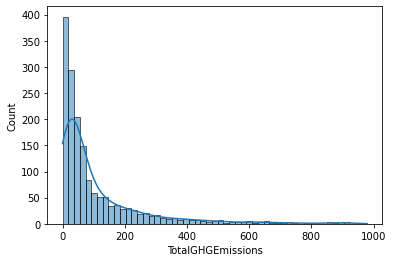

In [30]:
sns.histplot(data=df, x="TotalGHGEmissions", kde=True)

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

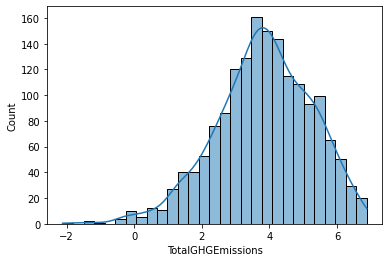

In [31]:
sns.histplot(data=df, x=np.log(df["TotalGHGEmissions"]), kde=True)

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

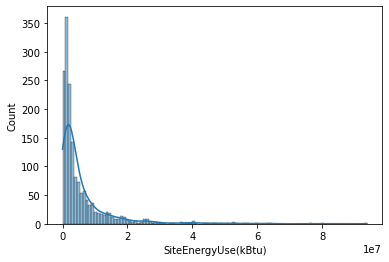

In [32]:
sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True)

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

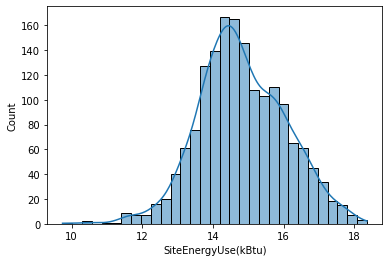

In [33]:
sns.histplot(data=df, x=np.log(df["SiteEnergyUse(kBtu)"]), kde=True)

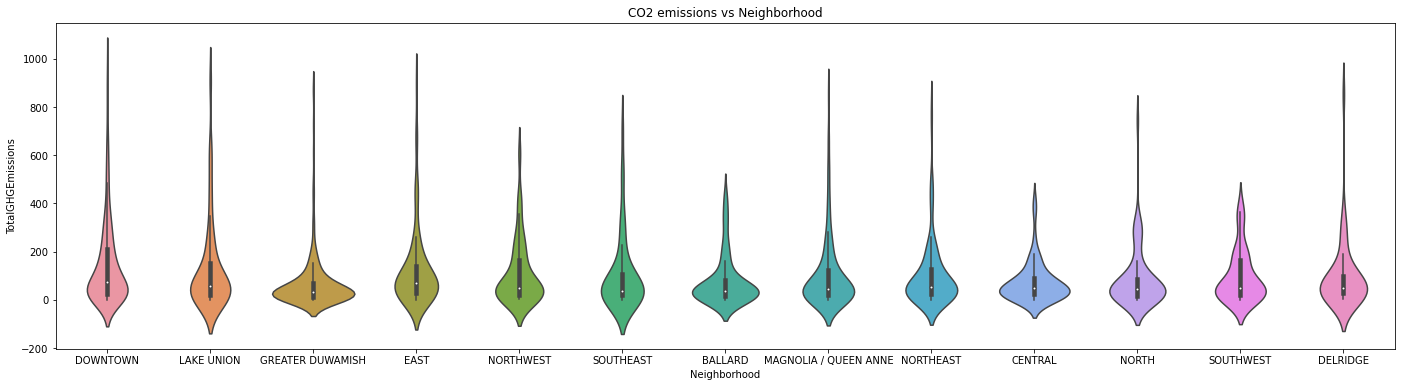

In [34]:
plt.figure(figsize=(24,6))
ax = sns.violinplot(x="Neighborhood", y="TotalGHGEmissions", data=df)
plt.title("CO2 emissions vs Neighborhood")
plt.show()

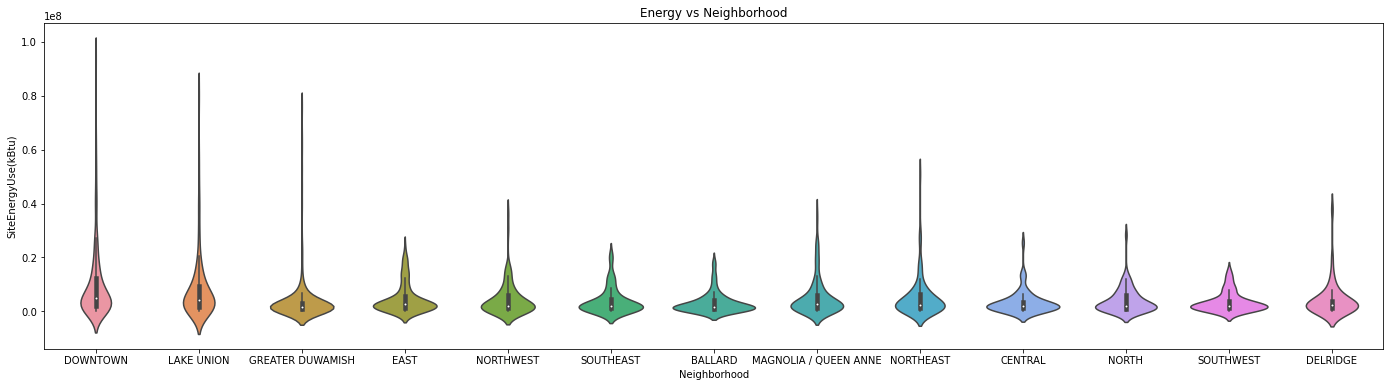

In [35]:
plt.figure(figsize=(24,6))
ax = sns.violinplot(x="Neighborhood", y="SiteEnergyUse(kBtu)", data=df)
plt.title('Energy vs Neighborhood')
plt.show()

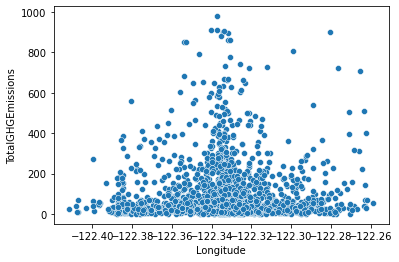

In [36]:
sns.scatterplot(data = df, x='Longitude', y='TotalGHGEmissions')
plt.show()

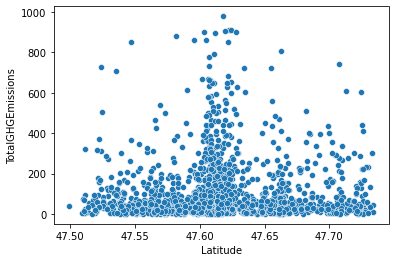

In [37]:
sns.scatterplot(data = df, x='Latitude', y='TotalGHGEmissions')
plt.show()

# Encodage et normalisation

Je sélectionne les variables numériques et catégorielles :

numerical_features = ['TotalUseTypeNumber','BuildingAge','ENERGYSTARScore',
                      'GFAPerBuilding','GFAParkingRate','GFABuildingRate',
                      'PropertyGFATotal','NumberofBuildings','GFAPerFloor',
                      'NumberofFloors','PropertyGFATotal_log','PropertyGFATotal_sqrt','PropertyGFATotal_square',
                      'GFAPerBuilding_log','GFAPerBuilding_sqrt','GFAPerBuilding_square',
                      'GFAParkingRate_log','GFAParkingRate_sqrt','GFAParkingRate_square',
                     'GFABuildingRate_log','GFABuildingRate_sqrt','GFABuildingRate_square',
                     'GFAPerFloor_log','GFAPerFloor_sqrt','GFAPerFloor_square']

categorical_features = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType']

In [38]:
from sklearn.compose import make_column_selector
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

Je créer des pipelines pour les opérations de pré-processing sur les variables numériques et catégorielles.

Je vais utiliser le transformer **RobustScaler** pour normaliser mes données numériques. Ce dernier, permet de limiter l'effet de potentiels outliers. 

J'utilise le transformer **OneHotEncoder** pour encoder mes variables catégorielles.

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

numerical_pipeline = make_pipeline(RobustScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))

In [40]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                       (categorical_pipeline, categorical_features))

# **Préparation des jeux de données**

Split du jeu de données en train set et test set :

On applique les opérations de preprocessing à chaque modèle que l'on va essayer (encodage + normalisation)

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

LinearRegression = make_pipeline(preprocessor, LinearRegression())
Lasso = make_pipeline(preprocessor, Lasso())
ElasticNet = make_pipeline(preprocessor,  ElasticNet(random_state=0))
XGBRegressor = make_pipeline(preprocessor, XGBRegressor())
RandomForestRegressor = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
y = df[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train : ",X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (1321, 33)
X_test :  (331, 33)
y_train :  (1321, 2)
y_test :  (331, 2)


# Evaluation des modèles

In [43]:
#fonction d'évaluation du modèle
def evaluate_model(model_grid, model_fit):
    df_results = pd.DataFrame.from_dict(model_grid.cv_results_).sort_values('rank_test_neg_mean_absolute_error')
    #-- best mean nMae--
    print('Best mean nMAE: {}'.format((model_fit.best_score_.round(2))))
    #-- best mean R² --
    print('Best mean R²: {}'.format(np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2']).round(2)))
    # fit_time:
    print('Fit time: {}s'.format(df_results.mean_fit_time.mean().round(2)))
    # parameters:
    print('\nBest parameters : {}\n'.format(model_fit.best_params_))
    return df_results

## Baseline : régression linéaire

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor

#dictionnaire des hyperparamètres du modèle LinearRegression
param_lr = {"linearregression__fit_intercept": [True, False],
            "linearregression__normalize": [True, False]}

#Recherche des meilleurs hyperparamètres du modèle avec GridSearchCV :
lr_grid = GridSearchCV(LinearRegression,
                        param_lr,
                        cv=5, 
                        scoring=('r2','neg_mean_absolute_error'),
                        return_train_score = True,
                        refit='neg_mean_absolute_error',
                        n_jobs = -1)

In [45]:
lr_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002A628330040>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002A62831A4C0>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=('r2', 'neg_mean_absolute_error'))

Entrainement et affichage des scores sur la variable `TotalGHGEmissions`

In [46]:
lr_optimized_model_GHG = lr_grid.fit(X_train,y_train['TotalGHGEmissions'])
lr_results_GHG = evaluate_model(lr_grid,lr_optimized_model_GHG)

Best mean nMAE: -67.4
Best mean R²: 0.41
Fit time: 0.06s

Best parameters : {'linearregression__fit_intercept': False, 'linearregression__normalize': True}



Entrainement et affichage des scores sur la variable `SiteEnergyUse(kBtu)`

In [47]:
lr_optimized_model_SEU = lr_grid.fit(X_train,y_train['SiteEnergyUse(kBtu)'])
lr_results_SEU = evaluate_model(lr_grid,lr_optimized_model_SEU)

Best mean nMAE: -2920265.61
Best mean R²: 0.49
Fit time: 0.06s

Best parameters : {'linearregression__fit_intercept': False, 'linearregression__normalize': True}



## Lasso

In [48]:
#dictionnaire des hyperparamètres du modèle LinearRegression
param_lasso = {"lasso__alpha":np.logspace(-5, 1, num=20),
               "lasso__max_iter":[10,100,1000]}

lasso_grid = GridSearchCV(Lasso,
                        param_lasso,
                        cv=5, 
                        scoring=('r2','neg_mean_absolute_error'),
                        return_train_score = True,
                        refit='neg_mean_absolute_error',
                        n_jobs = -1)

In [49]:
np.logspace(-5, 1, num=20)

array([1.00000000e-05, 2.06913808e-05, 4.28133240e-05, 8.85866790e-05,
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01])

In [50]:
lasso_optimized_model_GHG = lasso_grid.fit(X_train,y_train['TotalGHGEmissions'])
lasso_results_GHG = evaluate_model(lasso_grid,lasso_optimized_model_GHG)

Best mean nMAE: -64.96
Best mean R²: 0.52
Fit time: 0.19s

Best parameters : {'lasso__alpha': 0.26366508987303555, 'lasso__max_iter': 1000}



In [51]:
lasso_optimized_model_SEU = lasso_grid.fit(X_train,y_train['SiteEnergyUse(kBtu)'])
lasso_results_SEU = evaluate_model(lasso_grid,lasso_optimized_model_SEU)

Best mean nMAE: -2693793.03
Best mean R²: 0.67
Fit time: 0.21s

Best parameters : {'lasso__alpha': 10.0, 'lasso__max_iter': 10}



In [52]:
from sklearn import linear_model
import numpy as np

categorical_cols = df.select_dtypes(exclude=np.number)

# On crée un modèle de régression linéaire
lr1 = linear_model.LinearRegression()
lr2 = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr1.fit(X_train.drop(columns=categorical_cols),y_train['TotalGHGEmissions'])
lr2.fit(X_train.drop(columns=categorical_cols),y_train['SiteEnergyUse(kBtu)'])

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error1 = np.mean((lr1.predict(X_test.drop(columns=categorical_cols)) - y_test['TotalGHGEmissions']) ** 2)
baseline_error2 = np.mean((lr2.predict(X_test.drop(columns=categorical_cols)) - y_test['SiteEnergyUse(kBtu)']) ** 2)

print(baseline_error1)
print(baseline_error2)

13330.607978629969
22404669869760.785


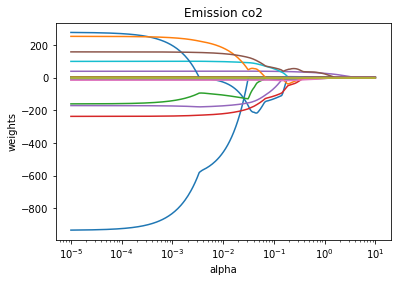

In [53]:
from sklearn import linear_model
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)
coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train.drop(columns=categorical_cols), y_train['TotalGHGEmissions'])
    coefs.append(lasso.coef_)
    errors.append([baseline_error1, np.mean((lasso.predict(X_test.drop(columns=categorical_cols)) - y_test['TotalGHGEmissions']) ** 2)])
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Emission co2')
plt.axis('tight')
plt.show()    

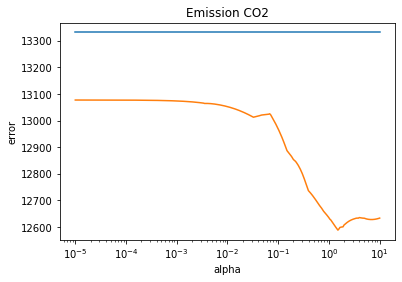

In [54]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Emission CO2')
plt.show()

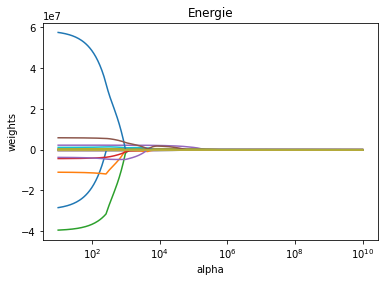

In [55]:
n_alphas = 300
alphas = np.logspace(10, 1, n_alphas)

coefs2 = []
errors2 = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train.drop(columns=categorical_cols), y_train['SiteEnergyUse(kBtu)'])
    coefs2.append(lasso.coef_)
    errors2.append([baseline_error2, np.mean((lasso.predict(X_test.drop(columns=categorical_cols)) - y_test['SiteEnergyUse(kBtu)']) ** 2)])
    
ax = plt.gca()

ax.plot(alphas, coefs2)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Energie')
plt.axis('tight')
plt.show()    

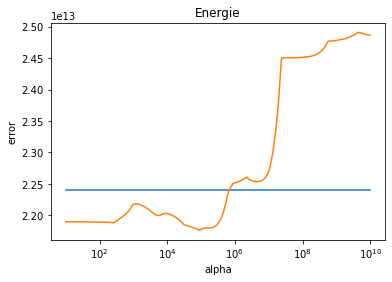

In [56]:
ax = plt.gca()

ax.plot(alphas, errors2)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Energie')
plt.show()

## Elastic Net

In [57]:
param_net = {"elasticnet__max_iter": [10,100,1000],
             "elasticnet__alpha": np.logspace(-4, 0, num=5),
             "elasticnet__l1_ratio": np.arange(0.0, 1.9, 0.1)}

net_grid = GridSearchCV( ElasticNet,
                            param_net,
                            cv=5, 
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

In [58]:
net_optimized_model_GHG = net_grid.fit(X_train,y_train['TotalGHGEmissions'])
net_results_GHG = evaluate_model(net_grid,net_optimized_model_GHG)

Best mean nMAE: -64.74
Best mean R²: 0.53
Fit time: 0.13s

Best parameters : {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.4, 'elasticnet__max_iter': 1000}



In [59]:
net_optimized_model_SEU = net_grid.fit(X_train,y_train['SiteEnergyUse(kBtu)'])
net_results_SEU = evaluate_model(net_grid,net_optimized_model_SEU)

Best mean nMAE: -2598781.48
Best mean R²: 0.68
Fit time: 0.14s

Best parameters : {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.8, 'elasticnet__max_iter': 10}



## XGBoost

In [60]:
param_xgb = {'xgbregressor__learning_rate' : [0.01, 0.001],
             'xgbregressor__max_depth': [10,15],
             'xgbregressor__min_child_weight' : [6,3],
             'xgbregressor__n_estimators': [200,400]}

xgb_grid = GridSearchCV( XGBRegressor,
                            param_xgb,
                            cv=5, 
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

In [61]:
xgb_optimized_model_GHG = xgb_grid.fit(X_train,y_train['TotalGHGEmissions'])
xgb_results_GHG = evaluate_model(xgb_grid,xgb_optimized_model_GHG)

Best mean nMAE: -63.34
Best mean R²: 0.48
Fit time: 8.16s

Best parameters : {'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 10, 'xgbregressor__min_child_weight': 6, 'xgbregressor__n_estimators': 200}



In [62]:
xgb_results_GHG.iloc[:1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.92457      0.475181         0.010409         0.00049   

  param_xgbregressor__learning_rate param_xgbregressor__max_depth  \
0                              0.01                            10   

  param_xgbregressor__min_child_weight param_xgbregressor__n_estimators  \
0                                    6                              200   

                                              params  split0_test_r2  \
0  {'xgbregressor__learning_rate': 0.01, 'xgbregr...        0.426614   

   split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
0         0.35424        0.543627        0.380876        0.536104   

   mean_test_r2  std_test_r2  rank_test_r2  split0_train_r2  split1_train_r2  \
0      0.448292     0.078308             5         0.813393          0.82145   

   split2_train_r2  split3_train_r2  split4_train_r2  mean_train_r2  \
0         0.811781         0.817934         0.809237       0.814759   

   std_train_r2  split0_test_neg_mean_absolute_error  \
0      0.004384                           -69.856947   

   split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
0                           -66.581576                           -58.054845   

   split3_test_neg_mean_absolute_error  split4_test_neg_mean_absolute_error  \
0                           -69.714067                           -52.481943   

   mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
0                         -63.337876                          6.920078   

   rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  \
0                                  1                            -34.808428   

   split1_train_neg_mean_absolute_error  split2_train_neg_mean_absolute_error  \
0                            -36.019459                            -36.472525   

   split3_train_neg_mean_absolute_error  split4_train_neg_mean_absolute_error  \
0                            -34.570604                            -37.491936   

   mean_train_neg_mean_absolute_error  std_train_neg_mean_absolute_error  
0                           -35.87259                           1.079943

In [63]:
xgb_optimized_model_SEU = xgb_grid.fit(X_train,y_train['SiteEnergyUse(kBtu)'])
xgb_results_SEU = evaluate_model(xgb_grid,xgb_optimized_model_SEU)

Best mean nMAE: -2396039.49
Best mean R²: 0.68
Fit time: 7.38s

Best parameters : {'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 10, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 400}



## Random Forest

In [64]:
#dictionnaire des hyperparamètres du modèle RandomForestRegressor
param_rfr = {'randomforestregressor__n_estimators':[50, 100, 120],
             'randomforestregressor__max_features' : ['sqrt', 'log2'],
             'randomforestregressor__max_depth': [5,10,20],
             'randomforestregressor__min_samples_split': [1, 2, 3],
             'randomforestregressor__bootstrap' : [True, False],
             'randomforestregressor__min_samples_leaf': [1,2,3,4]}

rfr_grid = GridSearchCV(RandomForestRegressor,
                        param_rfr,
                        cv=5, 
                        scoring=('r2','neg_mean_absolute_error'),
                        return_train_score = True,
                        refit='neg_mean_absolute_error',
                        n_jobs = -1)

Entrainement et affichage des scores sur la variable `SiteEnergyUse(kBtu)`

In [97]:
rfr_optimized_model_GHG = rfr_grid.fit(X_train,y_train['TotalGHGEmissions'])
rfr_results_GHG = evaluate_model(rfr_grid, rfr_optimized_model_GHG)

Best mean nMAE: -62.52
Best mean R²: 0.51
Fit time: 0.21s

Best parameters : {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 120}



In [66]:
rfr_optimized_model_SEU = rfr_grid.fit(X_train,y_train['SiteEnergyUse(kBtu)'])
rfr_results_SEU = evaluate_model(rfr_grid, rfr_optimized_model_SEU)

Best mean nMAE: -2494502.66
Best mean R²: 0.68
Fit time: 0.22s

Best parameters : {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 100}



In [67]:
rfr_results_SEU.iloc[:1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
367       0.740275      0.016817          0.02162        0.001358   

    param_randomforestregressor__bootstrap  \
367                                  False   

    param_randomforestregressor__max_depth  \
367                                     20   

    param_randomforestregressor__max_features  \
367                                      sqrt   

    param_randomforestregressor__min_samples_leaf  \
367                                             1   

    param_randomforestregressor__min_samples_split  \
367                                              3   

    param_randomforestregressor__n_estimators  \
367                                       100   

                                                params  split0_test_r2  \
367  {'randomforestregressor__bootstrap': False, 'r...        0.747261   

     split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
367        0.738484        0.701559        0.503585        0.673801   

     mean_test_r2  std_test_r2  rank_test_r2  split0_train_r2  \
367      0.672938      0.08868            11         0.996994   

     split1_train_r2  split2_train_r2  split3_train_r2  split4_train_r2  \
367         0.995474         0.996795         0.996604         0.996123   

     mean_train_r2  std_train_r2  split0_test_neg_mean_absolute_error  \
367       0.996398      0.000545                        -2.691517e+06   

     split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
367                        -2.386731e+06                        -2.304871e+06   

     split3_test_neg_mean_absolute_error  split4_test_neg_mean_absolute_error  \
367                        -2.806705e+06                        -2.282690e+06   

     mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
367                      -2.494503e+06                     213880.766009   

     rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  \
367                                  1                        -289316.808787   

     split1_train_neg_mean_absolute_error  \
367                        -332473.565625   

     split2_train_neg_mean_absolute_error  \
367                        -289678.088389   

     split3_train_neg_mean_absolute_error  \
367                        -294949.285042   

     split4_train_neg_mean_absolute_error  mean_train_neg_mean_absolute_error  \
367                        -316106.854037                      -304504.920376   

     std_train_neg_mean_absolute_error  
367                       17080.244898

In [68]:
rfr_results_GHG.iloc[:1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
404       0.649791      0.020759         0.035432        0.011545   

    param_randomforestregressor__bootstrap  \
404                                  False   

    param_randomforestregressor__max_depth  \
404                                     20   

    param_randomforestregressor__max_features  \
404                                      log2   

    param_randomforestregressor__min_samples_leaf  \
404                                             1   

    param_randomforestregressor__min_samples_split  \
404                                              3   

    param_randomforestregressor__n_estimators  \
404                                       120   

                                                params  split0_test_r2  \
404  {'randomforestregressor__bootstrap': False, 'r...        0.479799   

     split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
404        0.429226        0.588392        0.467192        0.594781   

     mean_test_r2  std_test_r2  rank_test_r2  split0_train_r2  \
404      0.511878     0.067208             1         0.985673   

     split1_train_r2  split2_train_r2  split3_train_r2  split4_train_r2  \
404         0.985702         0.985318         0.984572         0.985918   

     mean_train_r2  std_train_r2  split0_test_neg_mean_absolute_error  \
404       0.985437      0.000473                           -70.077693   

     split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
404                           -65.292127                           -57.710129   

     split3_test_neg_mean_absolute_error  split4_test_neg_mean_absolute_error  \
404                           -66.634734                           -52.868881   

     mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
404                         -62.516713                          6.293065   

     rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  \
404                                  1                            -11.776161   

     split1_train_neg_mean_absolute_error  \
404                            -11.727837   

     split2_train_neg_mean_absolute_error  \
404                            -11.945076   

     split3_train_neg_mean_absolute_error  \
404                            -12.351614   

     split4_train_neg_mean_absolute_error  mean_train_neg_mean_absolute_error  \
404                            -12.230007                          -12.006139   

     std_train_neg_mean_absolute_error  
404                            0.24639

# Sélection des meilleurs modèles

## Modèle pour la prédiction des émissions de CO2

In [69]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']

GHG_compare_metrics = pd.concat([
           pd.DataFrame(lr_results_GHG[metrics].iloc[:1].mean(), columns=['LinearRegression (baseline)']),
           pd.DataFrame(lasso_results_GHG[metrics].iloc[:1].mean(), columns=['Lasso']),
           pd.DataFrame(net_results_GHG[metrics].iloc[:1].mean(), columns=['ElasticNet']),
           pd.DataFrame(xgb_results_GHG[metrics].iloc[:1].mean(), columns=['XGB']),
           pd.DataFrame(rfr_results_GHG[metrics].iloc[:1].mean(), columns=['RandomForest'])
          ], axis=1)

GHG_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['LinearRegression (baseline)','Lasso',
                                            'ElasticNet','XGB',
                                            'RandomForest'])
for m in metrics:
    GHG_final_metrics_compare[m] = GHG_compare_metrics.loc[m]

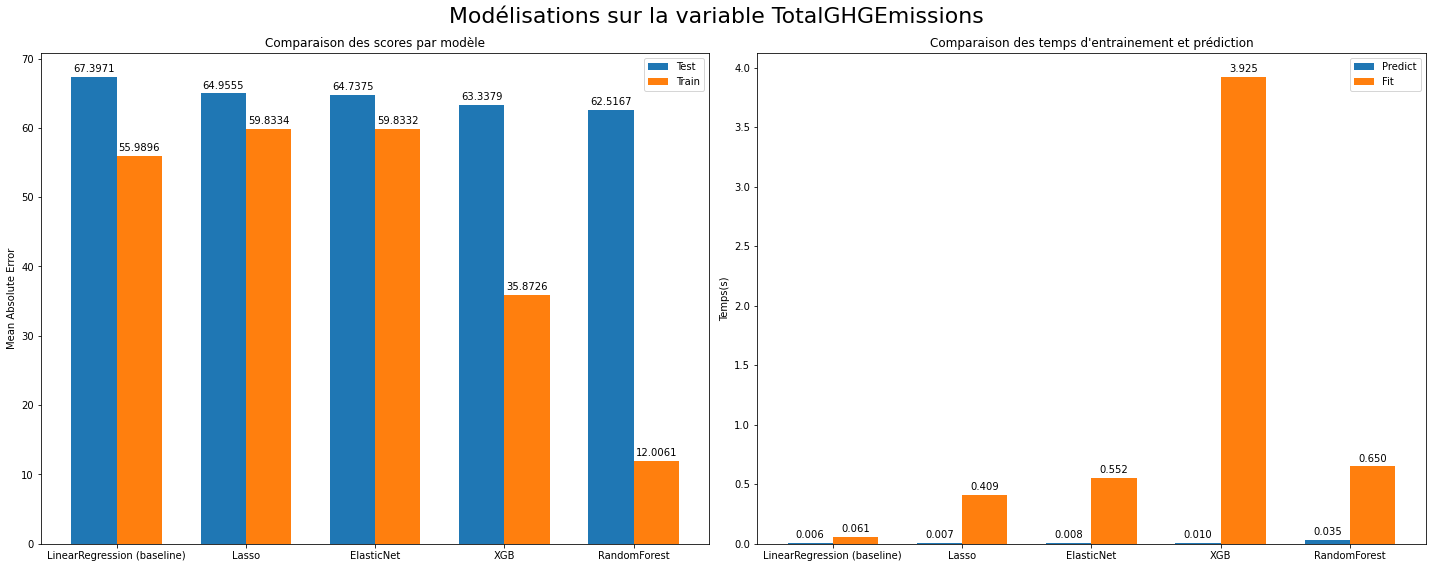

In [70]:
x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable TotalGHGEmissions", fontsize=22)
fig.tight_layout()

plt.show()

## Importance des features C02 :

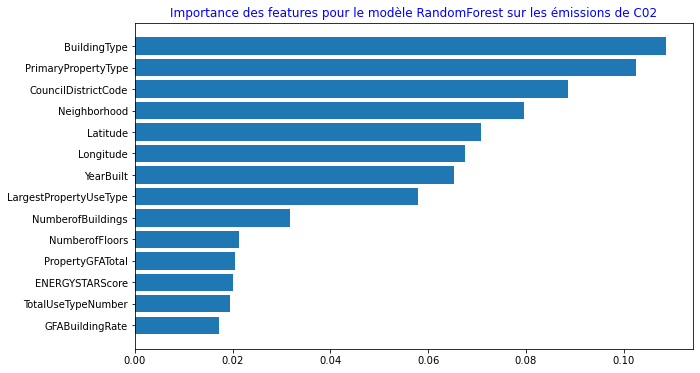

In [71]:
importances = rfr_optimized_model_GHG.best_estimator_.named_steps.randomforestregressor.feature_importances_
# Sort in ascending order
sorted_array = np.sort(importances)
# Reverse the sorted array
reverse_array = sorted_array[::-1]
# Select top ten features
reverse_array = reverse_array[:14]

indices = np.argsort(reverse_array)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len(reverse_array)), reverse_array[indices])
ax.set_yticks(range(len(reverse_array)))
ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title('Importance des features pour le modèle RandomForest sur les émissions de C02',color='b')
plt.show()

## Modèle pour la prédiction de l'énergie

In [72]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']

SEU_compare_metrics = pd.concat([
           pd.DataFrame(lr_results_SEU[metrics].iloc[:1].mean(), columns=['LinearRegression (baseline)']),
           pd.DataFrame(lasso_results_SEU[metrics].iloc[:1].mean(), columns=['Lasso']),
           pd.DataFrame(net_results_SEU[metrics].iloc[:1].mean(), columns=['ElasticNet']),
           pd.DataFrame(xgb_results_SEU[metrics].iloc[:1].mean(), columns=['XGB']),
           pd.DataFrame(rfr_results_SEU[metrics].iloc[:1].mean(), columns=['RandomForest'])
          ], axis=1)

SEU_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['LinearRegression (baseline)','Lasso',
                                            'ElasticNet','XGB',
                                            'RandomForest'])
for m in metrics:
    SEU_final_metrics_compare[m] = SEU_compare_metrics.loc[m]

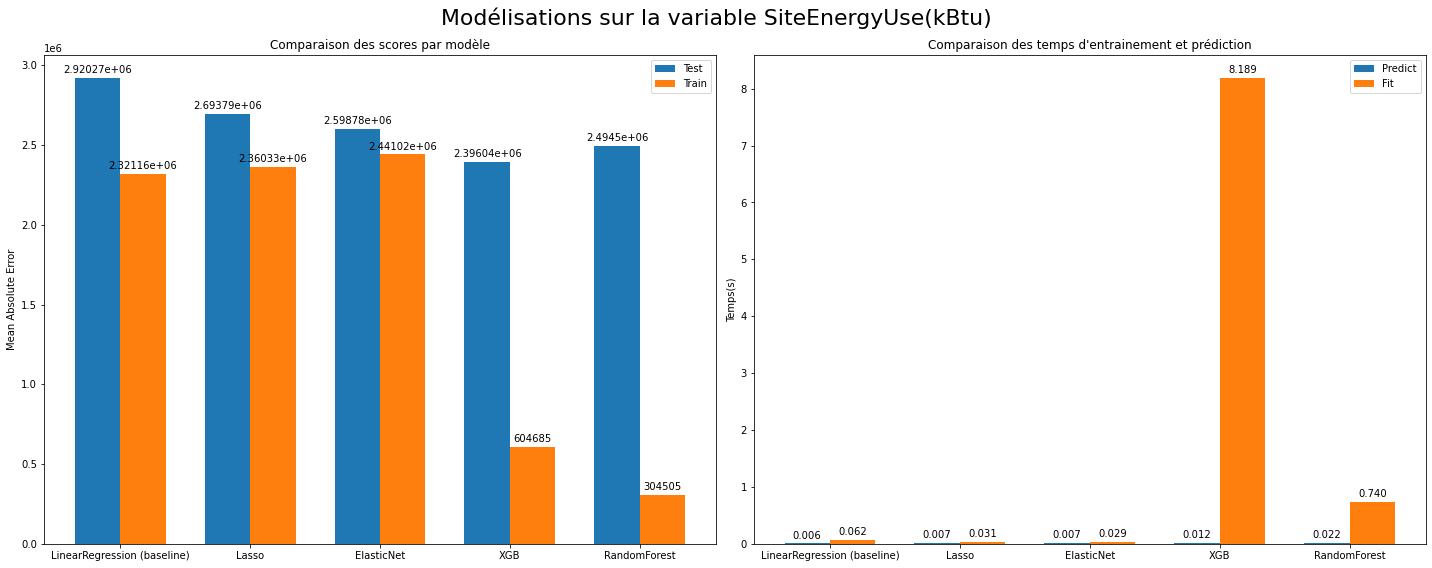

In [73]:
x = np.arange(len(SEU_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*SEU_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*SEU_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(SEU_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, SEU_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, SEU_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(SEU_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable SiteEnergyUse(kBtu)", fontsize=22)
fig.tight_layout()

plt.show()

## Importance des features SEU

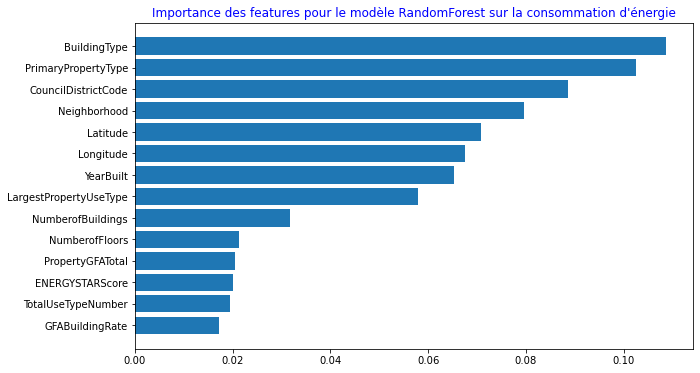

In [74]:
importances_SEU = rfr_optimized_model_SEU.best_estimator_.named_steps.randomforestregressor.feature_importances_
# Sort in ascending order
sorted_array = np.sort(importances_SEU)
# Reverse the sorted array
reverse_array = sorted_array[::-1]
# Select top ten features
reverse_array = reverse_array[:14]

indices = np.argsort(reverse_array)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len(reverse_array)), reverse_array[indices])
ax.set_yticks(range(len(reverse_array)))
ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title("Importance des features pour le modèle RandomForest sur la consommation d'énergie",color='b')
plt.show()

# Test du modèle

## Prédiction des émissions de CO2

In [75]:
X_test.shape

(331, 33)

In [76]:
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title),fontsize=18)
    plt.show()

In [98]:
GHG_pred = rfr_optimized_model_GHG.predict(X_test)

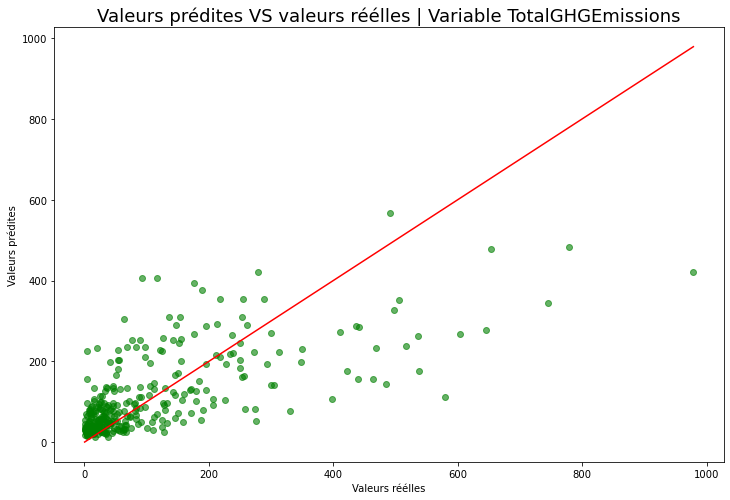

In [99]:
plot_pred_true(y_test['TotalGHGEmissions'],GHG_pred, color="g", title="TotalGHGEmissions")

In [108]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [109]:
#Calcul des métriques pour les émissions de CO2
GHGmetrics = metrics_model(y_test['TotalGHGEmissions'],GHG_pred)
GHGmetrics

Métrique  Résultats
0      MAE  68.465627
1       R²   0.469389

In [81]:
y_test.shape

(331, 2)

## Prédiction de la consommation d'énergie

In [82]:
SEU_pred = rfr_optimized_model_SEU.predict(X_test)

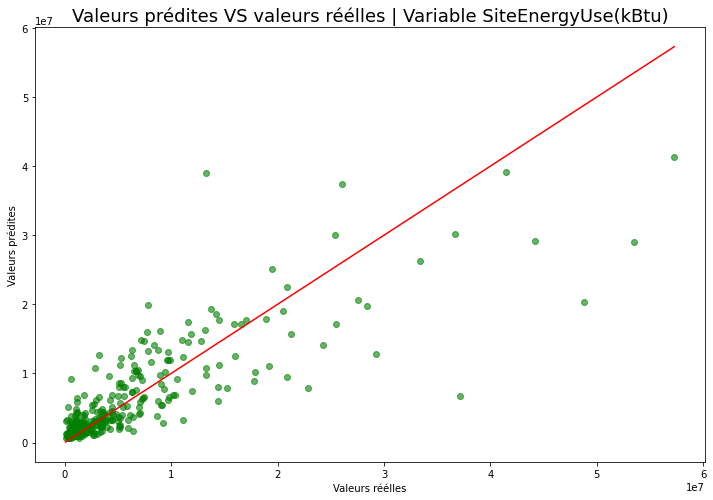

In [83]:
plot_pred_true(y_test['SiteEnergyUse(kBtu)'],SEU_pred, color="g", title="SiteEnergyUse(kBtu)")

In [84]:
SEUmetrics = metrics_model(y_test['SiteEnergyUse(kBtu)'],SEU_pred)
SEUmetrics

Métrique     Résultats
0      MAE  2.546693e+06
1       R²  6.877536e-01

## **Sans ENERGY STAR SCORE**

In [85]:
df2 = df.drop('ENERGYSTARScore', axis=1)

In [86]:
X2 = df2.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
y2 = df2[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [87]:
rfr_optimized_model_GHG2 = rfr_grid.fit(X_train2,y_train2['TotalGHGEmissions'])

In [88]:
GHG_pred2 = rfr_optimized_model_GHG2.predict(X_test2)

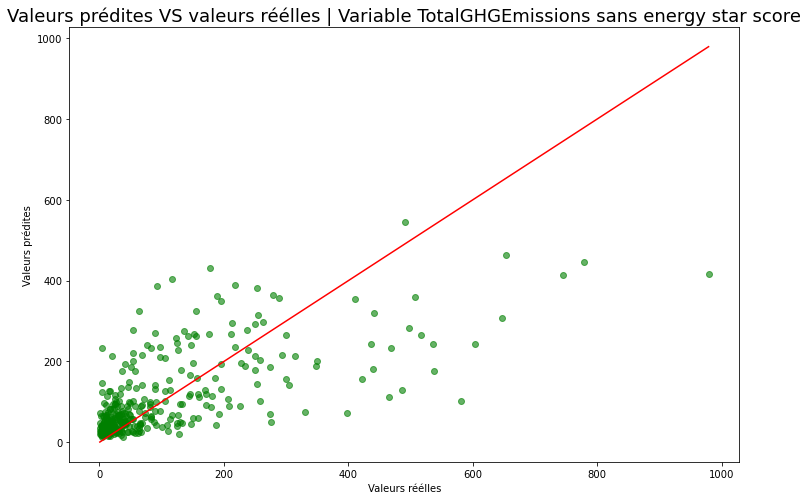

In [89]:
plot_pred_true(y_test['TotalGHGEmissions'],GHG_pred2, color="g", title="TotalGHGEmissions sans energy star score")

In [90]:
rfr_results_GHG2 = evaluate_model(rfr_grid, rfr_optimized_model_GHG2)

Best mean nMAE: -63.06
Best mean R²: 0.5
Fit time: 0.21s

Best parameters : {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 120}



In [91]:
#Calcul des métriques pour les émissions de CO2
GHGmetrics2 = metrics_model(y_test['TotalGHGEmissions'],GHG_pred2)
GHGmetrics2

Métrique  Résultats
0      MAE   70.25420
1       R²    0.44747

In [92]:
rfr_optimized_model_SEU = rfr_grid.fit(X_train2,y_train2['SiteEnergyUse(kBtu)'])

In [93]:
SEU_pred2 = rfr_optimized_model_SEU.predict(X_test2)

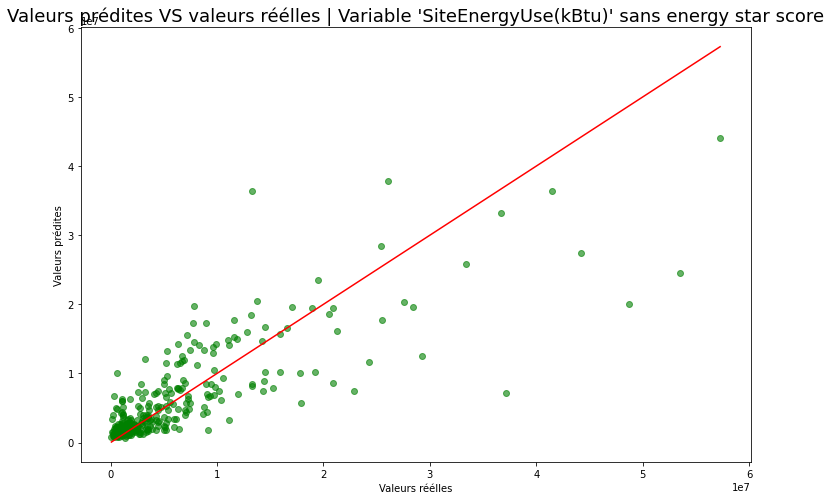

In [94]:
plot_pred_true(y_test['SiteEnergyUse(kBtu)'],SEU_pred2, color="g", title="'SiteEnergyUse(kBtu)' sans energy star score")

In [95]:
rfr_results_SEU = evaluate_model(rfr_grid, rfr_optimized_model_SEU)

Best mean nMAE: -2588641.1
Best mean R²: 0.67
Fit time: 0.21s

Best parameters : {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 100}



In [96]:
#Calcul des métriques pour les émissions de CO2
SEUmetrics2 = metrics_model(y_test['SiteEnergyUse(kBtu)'],SEU_pred2)
SEUmetrics2

Métrique     Résultats
0      MAE  2.677063e+06
1       R²  6.663626e-01

**La variable EnergyStar score ne change pas l'impact sur la prédiction.**